# Домашнее задание на 09.03.2023
# Выполнил: Радайкин Артём, ПМ20-4

1. Выбрать факторы (на свой счёт)
2. Берём и строим 4 модели за каждый год
3. 17,18 - модель 
4. 17, 18, 19 и также с 20 - модели
5. 70 и 30 или 80 и 20. Проветси анализ адекватности модели на разных  выборках. Построить ROC кривую. (Думаю, весь анализ машинки).
6. Интереснее всего - это узнать аналитику.  

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import re
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, auc

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Эконометрика /Семестр_6'

/content/drive/MyDrive/Colab Notebooks/Эконометрика /Семестр_6


## Считывание данных

In [ ]:
df = pd.read_excel('agriculture_2021.xlsx', index_col=0) 

In [ ]:
df.head()

,Регистрационный номер,Статус,Регион регистрации,Код ОКАТО,Вид деятельности/отрасль,ИДО,ИФР,Сводный индикатор,"Уставный капитал, RUB","2017, Основные средства , RUB",...,"2017, Коэффициент быстрой ликвидности, %","2018, Коэффициент быстрой ликвидности, %","2019, Коэффициент быстрой ликвидности, %","2020, Коэффициент быстрой ликвидности, %","2017, Коэффициент абсолютной ликвидности, %","2018, Коэффициент абсолютной ликвидности, %","2019, Коэффициент абсолютной ликвидности, %","2020, Коэффициент абсолютной ликвидности, %",Отрасль,Округ
0,1020100510198,0,Адыгея (Республика) (Адыгея),79205000007,"Выращивание зерновых (кроме риса), зернобобовы...",1.0,6.0,Низкий риск,36076000.0,293239000.0,...,1.0246,0.8768,1.4678,7.3216,0.3789,0.4929,0.8792,5.8614,Растениеводство,Южный ФО
1,1020100511265,0,Адыгея (Республика) (Адыгея),79240000004,Выращивание однолетних культур,2.0,6.0,Низкий риск,300000.0,13286000.0,...,3.4128,19.9143,12.3069,16.1235,2.4966,17.7786,10.1287,13.8741,Растениеводство,Южный ФО
2,1020100698265,0,Адыгея (Республика) (Адыгея),79222000024,Выращивание однолетних кормовых культур,23.0,NaN,Низкий риск,NaN,3446000.0,...,NaN,0.2093,NaN,NaN,NaN,0.2093,NaN,NaN,Растениеводство,Южный ФО
3,1020100704788,0,Адыгея (Республика) (Адыгея),79222000023,Выращивание зерновых культур,NaN,NaN,NaN,4000.0,21556000.0,...,0.5534,0.1066,0.2757,1.2159,0.1309,0.0770,0.1663,0.5103,Растениеводство,Южный ФО
4,1020100707681,0,Адыгея (Республика) (Адыгея),79222000023,Выращивание зерновых культур,4.0,8.0,Низкий риск,11000.0,8964000.0,...,0.1391,0.4313,1.0024,1.3188,0.0004,0.0885,0.0056,0.1165,Растениеводство,Южный ФО


In [ ]:
df['Округ'].value_counts()

Приволжский ФО        2701
Центральный ФО        2255
Южный ФО              1686
Сибирский ФО          1092
Уральский ФО           538
Северо-Западный ФО     391
Name: Округ, dtype: int64

In [ ]:
df[df['Округ'] == 'Приволжский ФО']['Вид деятельности/отрасль'].value_counts().head(5)

Смешанное сельское хозяйство                                                         668
Выращивание зерновых культур                                                         638
Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур    464
Разведение молочного крупного рогатого скота, производство сырого молока             361
Выращивание однолетних культур                                                       233
Name: Вид деятельности/отрасль, dtype: int64

### Как видно на круговой диаграмме, существует явный дисбаланс классов в данном датасете (и ситуация не меняется при рассмотрении региона или/и отрасли)

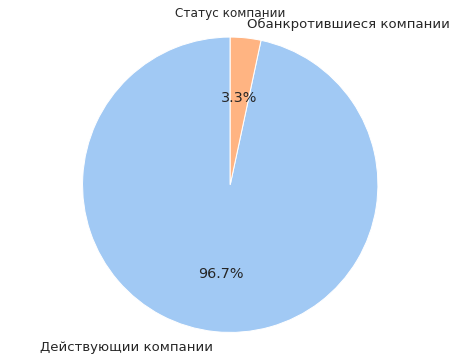

In [ ]:
labels = ['Действующии компании', 'Обанкротившиеся компании']

colors = sns.color_palette('pastel')[0:5]

data = df['Статус'].value_counts()

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
plt.title('Статус компании')
sns.set(font_scale=1.2)
sns.color_palette("Set2")
plt.pie(data, labels=labels, autopct='%1.1f%%', colors = colors, startangle=90)
plt.axis('equal')
plt.show()

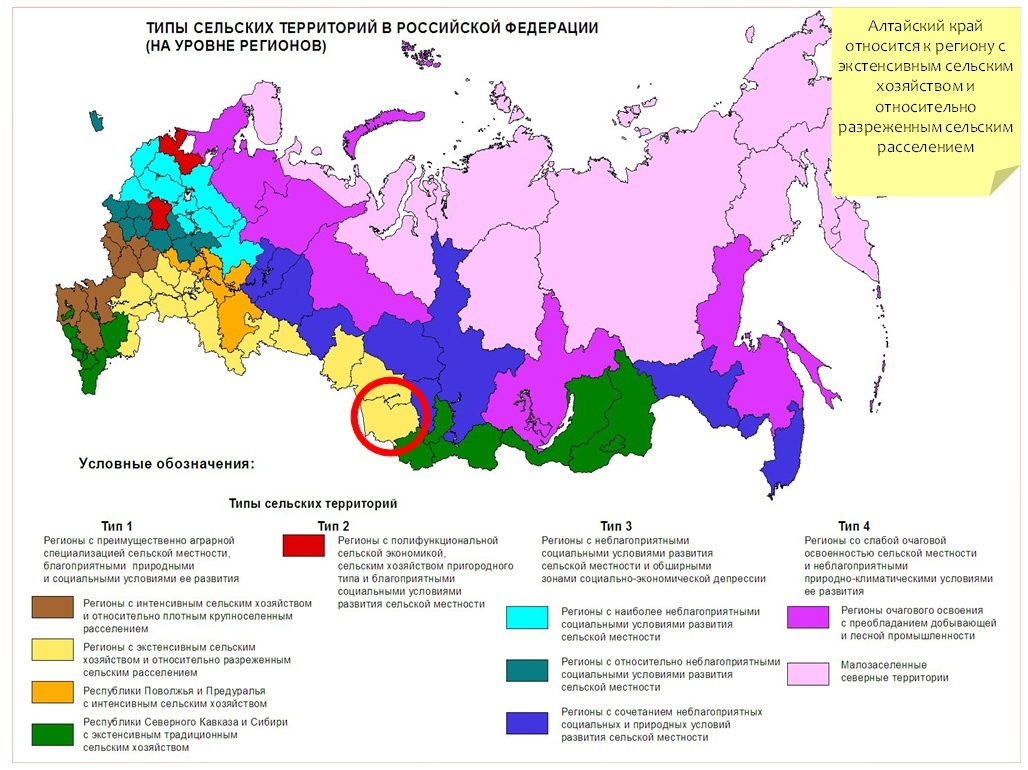

## Для исследования и дальнейшего построения модели выберем **Приволжский ФО** и рассмотрим в нём три отрасли:
 
* **Смешанное сельское хозяйство**                                                     
*   **Выращивание зерновых культур**              
*   **Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур**

Выбор округа и отраслей был основан на анализе карты "Типы сельских территорий в РФ", а также на анлизе видов деятельности в этом округе (3 самые популярные). Также я сам лично заинтересован в анализе Приволжский ФО, т.к. проживаю в нём.

In [ ]:
df_1 = df[(df['Округ'] == 'Приволжский ФО') &
          ((df['Вид деятельности/отрасль'] == 'Смешанное сельское хозяйство') |
           (df['Вид деятельности/отрасль'] == 'Выращивание зерновых культур') | 
           (df['Вид деятельности/отрасль'] == 'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур'))]  

In [ ]:
df_1['Вид деятельности/отрасль'].value_counts()

Смешанное сельское хозяйство                                                         668
Выращивание зерновых культур                                                         638
Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур    464
Name: Вид деятельности/отрасль, dtype: int64

In [ ]:
df_1.columns

Index(['Регистрационный номер', 'Статус', 'Регион регистрации', 'Код ОКАТО',
       'Вид деятельности/отрасль', 'ИДО', 'ИФР', 'Сводный индикатор',
       'Уставный капитал, RUB', '2017, Основные средства , RUB',
       ...
       '2017, Коэффициент быстрой ликвидности, %',
       '2018, Коэффициент быстрой ликвидности, %',
       '2019, Коэффициент быстрой ликвидности, %',
       '2020, Коэффициент быстрой ликвидности, %',
       '2017, Коэффициент абсолютной ликвидности, %',
       '2018, Коэффициент абсолютной ликвидности, %',
       '2019, Коэффициент абсолютной ликвидности, %',
       '2020, Коэффициент абсолютной ликвидности, %', 'Отрасль', 'Округ'],
      dtype='object', length=207)

### Преобразуем ИДО и ИФР для дальнейшего анализа. Разделим эти индексы на 3 типа: **низкий**, **средний**, **высокий** (уровень риска).
Делаем это для того, чтобы повысить качество модели т.к. данных для иследования мало всего 1770 строк (до предварительной очистки пустых значений), а разброс индекса ИДО и ФИР от 0 до 100 (относительно большой)   

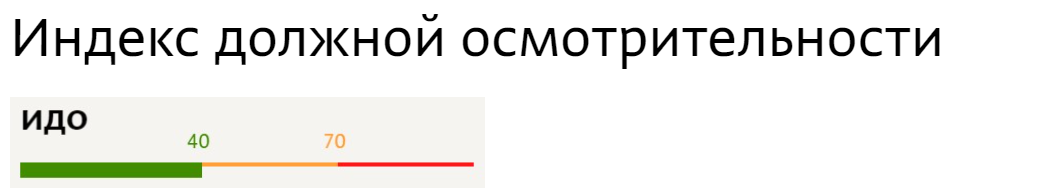

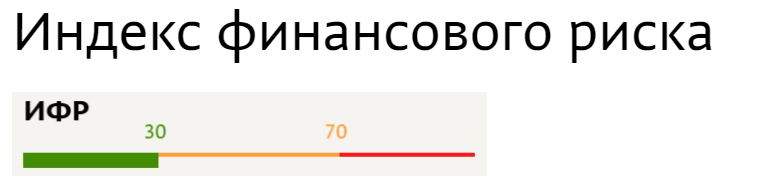

In [ ]:
df_1['ИДО'].isna().sum()

125

In [ ]:
df_1['ИФР'].isna().sum()

167

Т.к. ИДО и ИФР имеют пропуски, заменим эти попуски на средние значения 

In [ ]:
df_1['ИДО'] = df_1['ИДО'].fillna(df_1['ИДО'].mean())
df_1['ИФР'] = df_1['ИФР'].fillna(df_1['ИФР'].mean())

<ipython-input-13-f895f88281df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ИДО'] = df_1['ИДО'].fillna(df_1['ИДО'].mean())
<ipython-input-13-f895f88281df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ИФР'] = df_1['ИФР'].fillna(df_1['ИФР'].mean())


In [ ]:
df_1['ИДО'].isna().sum()

0

In [ ]:
df_1['ИФР'].isna().sum()

0

In [ ]:
def IDO(x):
    if x >= 0 and x <= 40:
        return "низкий"
    elif x > 40 and x <= 70:
        return "средний" 
    else:
        return "высокий"

In [ ]:
def IFR(x):
    if x >= 0 and x <= 30:
        return "низкий"
    elif x > 30 and x <= 70:
        return "средний" 
    else:
        return "высокий"

In [ ]:
df_1['ИДО'] = df_1['ИДО'].apply(IDO)
df_1['ИФР'] = df_1['ИФР'].apply(IFR)

<ipython-input-18-a2fc2509593c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ИДО'] = df_1['ИДО'].apply(IDO)
<ipython-input-18-a2fc2509593c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ИФР'] = df_1['ИФР'].apply(IFR)


## В качестве факторов возьмём:
* Индекс должной осмотрительности (ИДО) – скоринг, показывающий вероятность того, что компания является «фирмой-однодневкой»;
* Индекс финансового риска (ИФР) – оценка вероятности неплатежеспособности компании;
* Статус (для определения банкротства)
* Уставный капитал (может указывать на финансовую устойчивость компании)
* Чистые активы (показатель финансового состояния компании)
* Денежные средства и денежные эквиваленты (показатель ликвидности компании)
* Краткосрочные обязательства (показатель финансовых обязательств компании)
* Выручка (показатель финансовой производительности компании)
* Валовая прибыль (убыток) (показатель финансовой производительности компании)
* Коэффициент текущей ликвидности (показатель ликвидности компании)
* Коэффициент быстрой ликвидности (показатель ликвидности компании)
* Коэффициент абсолютной ликвидности (показатель ликвидности компании)

### После анализа различных факторов, данных и пропусков в данных, был сделан вывод, что эти факторы наимболее точно подходят для построения модели, а также указывают на разные аспекты платёжеспосбности и устойчивости компании (не копируя друг друга).  

In [ ]:
df_1.shape

(1770, 207)

In [ ]:
df_1 = df_1[['Статус', 'ИДО', 'ИФР', 'Уставный капитал, RUB', '2017, Чистые активы, RUB',
           '2018, Чистые активы, RUB', '2019, Чистые активы, RUB',
           '2020, Чистые активы, RUB',
           '2017, Кредиторская задолженность, RUB',
           '2018, Кредиторская задолженность, RUB', '2019, Кредиторская задолженность, RUB',
           '2020, Кредиторская задолженность, RUB', '2017, Краткосрочные обязательства, RUB',
           '2018, Краткосрочные обязательства, RUB','2019, Краткосрочные обязательства, RUB',
           '2020, Краткосрочные обязательства, RUB', '2017, Выручка, RUB',
           '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
           '2017, Денежные средства и денежные эквиваленты, RUB',
           '2018, Денежные средства и денежные эквиваленты, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2020, Денежные средства и денежные эквиваленты, RUB',
           '2017, Валовая прибыль (убыток), RUB',
           '2018, Валовая прибыль (убыток), RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2020, Валовая прибыль (убыток), RUB',
           '2017, Коэффициент текущей ликвидности, %', '2018, Коэффициент текущей ликвидности, %',
           '2019, Коэффициент текущей ликвидности, %', '2020, Коэффициент текущей ликвидности, %',
           '2017, Коэффициент быстрой ликвидности, %', '2018, Коэффициент быстрой ликвидности, %',
           '2019, Коэффициент быстрой ликвидности, %', '2020, Коэффициент быстрой ликвидности, %',
           '2017, Коэффициент абсолютной ликвидности, %', '2018, Коэффициент абсолютной ликвидности, %',
           '2019, Коэффициент абсолютной ликвидности, %', '2020, Коэффициент абсолютной ликвидности, %']]

In [ ]:
df_1.columns.shape

(40,)

In [ ]:
df_1[df_1['Статус'] == 0].shape

(1717, 40)

In [ ]:
df_2 = df_1[df_1['Статус'] == 0].dropna()

In [ ]:
df_2 = df_2.append(df_1[df_1['Статус'] == 1], ignore_index=True)

In [ ]:
df_2.fillna(df_2.mean(), inplace=True)

<ipython-input-25-a9feef9bec42>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2.fillna(df_2.mean(), inplace=True)


### Чтобы вычислить среднее значение вероятности, с которой правильно происходит предсказание, нужно вычислить долю правильных ответов алгоритма для каждой модели, т.е. это accuracy для каждой модели (при разном разбиении обучающей и тестовой выборки) и потом найти среднее значение accuracy для 7 моделей.  

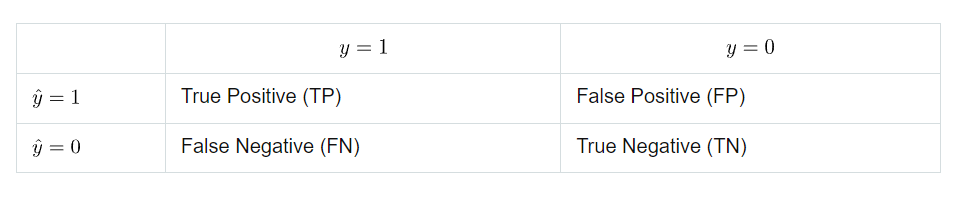

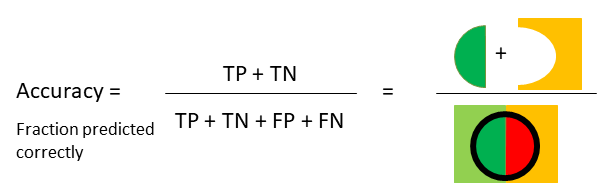

### Вычисление коэффициента псевдо-R2 МакФаддена  

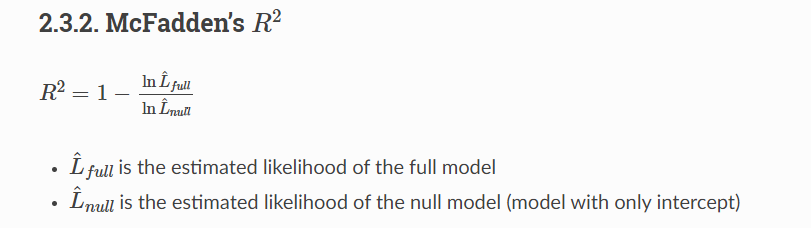

In [ ]:
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))

### Обучим наши модели:
* Строим четыре модели: за 2017, 2018, 2019, 2020 годы - то есть 4 модели 
* Строим еще три модели, объединяя годы: (2017+2018), (2017+2018+2019), (2017+2018+2019+2020)
* Прогоняем все 7 моделей в цикле из 10 повторов при разном разбиении обучающей и тестовой выборки

In [ ]:
list_years = [r'(2017),.*', r'(2018),.*', r'(2019),.*', r'(2020),.*', r'(2017|2018),.*', r'(2017|2018|2019),.*', r'(2017|2018|2019|2020),.*']
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Best_accuracy_score', 'Mean_accuracy_score',  'Precision_score', 'Recall_score', 'F1_score', 'Коэффициент псевдо-R^2 МакФаддена'])

In [ ]:
model_dict = {}
for i, year in enumerate(list_years):
    r = re.compile(year)
    col = list(filter(r.match, df_2.columns))
    col_names = ['Статус', 'ИДО', 'ИФР', 'Уставный капитал, RUB'] + col
    df_3 = df_2[col_names] 

    df_3 = pd.get_dummies(df_3)

    model_list = []
    r_list = []
    accuracy_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    y_train_list = []
    y_pred_list = []
    y_test_list = []
    X_train_list = []
    for size in range(1, 11):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df_3.drop('Статус', axis=1), df_3['Статус'], test_size=0.2+(size/100), random_state=42, stratify = df_3['Статус'])

        # Создание экземпляра класса LogisticRegression
        model = LogisticRegression(max_iter=4000, fit_intercept=False, solver='lbfgs')

        # Обучение модели на обучающей выборке
        model.fit(X_train, y_train)

        model_list.append(model)

        # Сделать прогнозы на тестовой выборке
        w = np.array(model.coef_).transpose()
        y_pred = model.predict_proba(X_test)[:, 1]

        r_list.append(mcfadden_rsquare(X=X_test, w=w, y=y_pred))
        accuracy_list.append(accuracy_score(y_test, model.predict(X_test)))
        precision_score_list.append(precision_score(y_test, model.predict(X_test))),
        recall_score_list.append(recall_score(y_test, model.predict(X_test))),
        f1_score_list.append(f1_score(y_test, model.predict(X_test)))
        y_train_list.append(y_train)
        y_pred_list.append(y_pred)
        y_test_list.append(y_test)
        X_train_list.append(X_train)
            

    r_max = np.argmax(np.array(r_list))
    f1_score_max = np.argmax(np.array(f1_score_list))
    accuracy_mean = np.array(accuracy_list).mean()

    # Отбор происходит по лучшему результату accuracy / Коэффициента псевдо-R^2 МакФаддена
    max_choise = f1_score_max

    model = model_list[max_choise]

    model_dict[year[1:-4]] = [model, y_train_list[max_choise], y_pred_list[max_choise], y_test_list[max_choise], X_train_list[max_choise]]

    df_differences.loc[i] = [year[1:-4] + ' год(а)',
                         np.round(accuracy_list[max_choise], 3),
                         np.round(accuracy_mean, 3),
                         np.round(precision_score_list[max_choise], 3),
                         np.round(recall_score_list[max_choise], 3),
                         np.round(f1_score_list[max_choise], 3),
                         np.round(r_list[max_choise], 3)]
    


## Лучшие 7 моделей, отобранные по лучшим значениям f1_score 

In [ ]:
df_differences

,Тип модели классификации,Best_accuracy_score,Mean_accuracy_score,Precision_score,Recall_score,F1_score,Коэффициент псевдо-R^2 МакФаддена
0,2017 год(а),0.954,0.954,0.500,0.182,0.267,0.561
1,2018 год(а),0.954,0.949,0.500,0.364,0.421,0.683
2,2019 год(а),0.971,0.967,0.833,0.455,0.588,0.721
3,2020 год(а),0.983,0.980,0.769,0.909,0.833,0.787
4,2017|2018 год(а),0.971,0.963,0.700,0.636,0.667,0.691
5,2017|2018|2019 год(а),0.979,0.971,0.750,0.818,0.783,0.744
6,2017|2018|2019|2020 год(а),0.983,0.971,0.769,0.909,0.833,0.859


## Лучшие 7 моделей, отобранные по лучшим значениям Коэффициента псевдо-R^2 МакФаддена

In [ ]:
df_differences

,Тип модели классификации,Best_accuracy_score,Mean_accuracy_score,Precision_score,Recall_score,F1_score,Коэффициент псевдо-R^2 МакФаддена
0,2017 год(а),0.954,0.954,0.500,0.182,0.267,0.561
1,2018 год(а),0.954,0.949,0.500,0.364,0.421,0.683
2,2019 год(а),0.971,0.967,0.833,0.455,0.588,0.721
3,2020 год(а),0.983,0.980,0.769,0.909,0.833,0.787
4,2017|2018 год(а),0.971,0.963,0.700,0.636,0.667,0.691
5,2017|2018|2019 год(а),0.979,0.971,0.750,0.818,0.783,0.744
6,2017|2018|2019|2020 год(а),0.983,0.971,0.769,0.909,0.833,0.859


### Найденные коэффициенты модели множественного выбора достаточно сложно интерпретировать с практической точки зрения, т.к. они не объясняют предельный эффект влияния объясняющих факторов на зависимую переменную. В этом случае обычно используют предельные эффекты каждого фактора (маржинальные эффекты).

Предельный коэффициент каждого объясняющего фактора хj , j=1,..,k является непрерывным и зависит от значения остальных факторов и определяется:

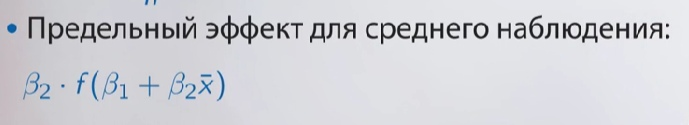

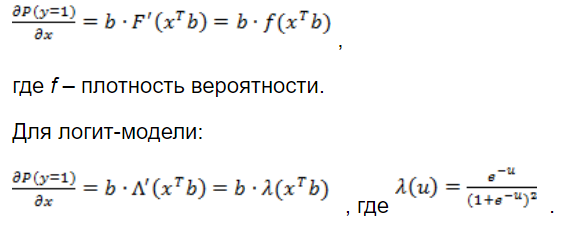

In [ ]:
for key in model_dict.keys():
    model, X = model_dict[key][0], model_dict[key][4].values
    coef = model.coef_
    u = np.mean(X, axis=0) @ coef.T
    print(key, ' год. Маржинальные (предельные) эффекты для каждого коэффициента: \n', *list(*np.round(coef * (np.exp(-u) / (1 * np.exp(-u)) ** 2) * 10 ** 14, 3)), '\n'*2)

2017  год. Маржинальные (предельные) эффекты для каждого коэффициента: 
 -1030.38 -12335.691 8848.571 704.548 -20939.457 -597844.754 27440.799 -29.212 -3.073 -1.239 0.013 -0.806 0.025 0.068 -0.71 -0.127 


2018  год. Маржинальные (предельные) эффекты для каждого коэффициента: 
 5274.559 -3449.656 138.846 597.764 -7421.329 -52430.289 -6888.962 -4.871 -1.124 -0.354 0.002 -0.14 0.008 0.016 -0.122 -0.024 


2019  год. Маржинальные (предельные) эффекты для каждого коэффициента: 
 572.991 -553.713 -405.132 902.994 -4436.493 -2313.256 -1240.936 -0.234 -0.043 -0.02 0.0 -0.005 0.0 0.001 -0.004 -0.001 


2020  год. Маржинальные (предельные) эффекты для каждого коэффициента: 
 -2.633 -0.522 -9.089 15.398 -49.023 30.185 3.267 -0.001 -0.0 -0.0 0.0 -0.0 0.0 0.0 -0.0 -0.0 


2017|2018  год. Маржинальные (предельные) эффекты для каждого коэффициента: 
 4328.277 3781.789 -5763.721 -1326.946 1283.486 4035.118 -2889.61 -1953.025 -6947.69 -36862.729 -29163.073 5248.606 -5337.811 -27.877 -24.901 -2.536 -5.

### Проверка значимости параметров логистической регрессии с помощью Вальде теста:

In [ ]:
def wald_test(x, y, beta_hat, model):
    # Получаем матрицу ковариаций
    cov_matrix = np.linalg.inv(np.dot(x.T, x))
    # Получаем стандартные ошибки коэффициентов
    std_err = np.sqrt(np.diagonal(cov_matrix))
    # Получаем t-статистики
    t_stat = beta_hat / std_err
    # Получаем p-value
    p_value = sts.t.sf(np.abs(t_stat), df=len(y) - 1 - 1) * 2
    return p_value

# Оцениваем значимость параметров
model = model_dict['2020'][0]
p_values = []
for i in range(model_dict['2020'][4].shape[1]):
    beta_hat = model.coef_[0, i]
    p_value = wald_test(model_dict['2020'][4], model_dict['2020'][1], beta_hat, model)
    p_values.append(p_value)

In [ ]:
p_values[0] < 0.05

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

## Вывод: в ходе оценки и сравнения параметров всех 7 моделей, было принято решения убрать такие факторы как 'ИДО', 'ИФР', т.к. эти факторы незначимы, а их маржинальные(предельные эффекты) сремятся к нулю (для всех моделей) и эти факторы незначимы (по Вальде тесту). 

## Таким образом, обучим новые модели:

In [ ]:
list_years = [r'(2017),.*', r'(2018),.*', r'(2019),.*', r'(2020),.*', r'(2017|2018),.*', r'(2017|2018|2019),.*', r'(2017|2018|2019|2020),.*']
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Best_accuracy_score', 'Mean_accuracy_score',  'Precision_score', 'Recall_score', 'F1_score', 'Коэффициент псевдо-R^2 МакФаддена'])

In [ ]:
model_dict = {}
for i, year in enumerate(list_years):
    r = re.compile(year)
    col = list(filter(r.match, df_2.columns))
    col_names = ['Статус', 'Уставный капитал, RUB'] + col
    df_3 = df_2[col_names] 

    df_3 = pd.get_dummies(df_3)

    model_list = []
    r_list = []
    accuracy_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    y_train_list = []
    y_pred_list = []
    y_test_list = []
    X_train_list = []
    for size in range(1, 11):
        # Разделение на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df_3.drop('Статус', axis=1), df_3['Статус'], test_size=0.2+(size/100), random_state=42, stratify = df_3['Статус'])

        # Создание экземпляра класса LogisticRegression
        model = LogisticRegression(max_iter=4000, fit_intercept=False, solver='lbfgs')

        # Обучение модели на обучающей выборке
        model.fit(X_train, y_train)

        model_list.append(model)

        # Сделать прогнозы на тестовой выборке
        w = np.array(model.coef_).transpose()
        y_pred = model.predict_proba(X_test)[:, 1]

        r_list.append(mcfadden_rsquare(X=X_test, w=w, y=y_pred))
        accuracy_list.append(accuracy_score(y_test, model.predict(X_test)))
        precision_score_list.append(precision_score(y_test, model.predict(X_test))),
        recall_score_list.append(recall_score(y_test, model.predict(X_test))),
        f1_score_list.append(f1_score(y_test, model.predict(X_test)))
        y_train_list.append(y_train)
        y_pred_list.append(y_pred)
        y_test_list.append(y_test)
        X_train_list.append(X_train)
            

    r_max = np.argmax(np.array(r_list))
    f1_score_max = np.argmax(np.array(f1_score_list))
    accuracy_mean = np.array(accuracy_list).mean()

    # Отбор происходит по лучшему результату accuracy / Коэффициента псевдо-R^2 МакФаддена
    max_choise = f1_score_max

    model = model_list[max_choise]

    model_dict[year[1:-4]] = [model, y_train_list[max_choise], y_pred_list[max_choise], y_test_list[max_choise], X_train_list[max_choise]]

    df_differences.loc[i] = [year[1:-4] + ' год(а)',
                         np.round(accuracy_list[max_choise], 3),
                         np.round(accuracy_mean, 3),
                         np.round(precision_score_list[max_choise], 3),
                         np.round(recall_score_list[max_choise], 3),
                         np.round(f1_score_list[max_choise], 3),
                         np.round(r_list[max_choise], 3)]
    


## Лучшие 7 моделей, отобранные по лучшим значениям f1_score 

In [ ]:
df_differences

,Тип модели классификации,Best_accuracy_score,Mean_accuracy_score,Precision_score,Recall_score,F1_score,Коэффициент псевдо-R^2 МакФаддена
0,2017 год(а),0.954,0.954,0.500,0.182,0.267,0.561
1,2018 год(а),0.954,0.949,0.500,0.364,0.421,0.683
2,2019 год(а),0.971,0.967,0.833,0.455,0.588,0.721
3,2020 год(а),0.983,0.980,0.769,0.909,0.833,0.787
4,2017|2018 год(а),0.971,0.963,0.700,0.636,0.667,0.691
5,2017|2018|2019 год(а),0.979,0.971,0.750,0.818,0.783,0.744
6,2017|2018|2019|2020 год(а),0.983,0.971,0.769,0.909,0.833,0.859


## Проанализировав полученные результаты, делаем вывод, что **модель построенная за 2020 год** показывает наилучшие результаты как по accuracy_score, так и по коэффициенту псевдо-R^2 МакФаддена. Её мы и оставим для дальнейшего анализа. 
## P.s. Также стоит отметить **модель за все года вместе взятые 2017|2018|2019|2020 год(а).** Она ненамного проигрывает модели только за 2020 год, а где-то даже лучше (Коэффициент псевдо-R^2 МакФаддена лучше). Поэтому мы её тоже проанализируем.	

## 1 модель: за 2020 год

### Проверим значимость модели с помощью ROC-кривой:

In [ ]:
# model_dict[year[1:-4]] = [model, y_train_list[max_choise], y_pred_list[max_choise], y_test_list[max_choise], X_train_list[max_choise]]

In [ ]:
# Данные для ROC-AUC кривой
fpr, tpr, treshold = roc_curve(model_dict['2020'][3], model_dict['2020'][2])
roc_auc = auc(fpr, tpr)
roc_auc_model = roc_auc_score(model_dict['2020'][3], model_dict['2020'][2])

# Оценка качества простой базовой модели
y_base = [model_dict['2020'][1].value_counts().idxmax()] * len(model_dict['2020'][3])
roc_auc_base = roc_auc_score(model_dict['2020'][3], y_base)

# Сравнение качества моделей
if roc_auc > roc_auc_base:
    print(f'roc_auc ({np.round(roc_auc,3)}) > roc_auc_base({round(roc_auc_base, 3)}) => Модель значима')
else:
    print(f'roc_auc ({np.round(roc_auc,3)}) < roc_auc_base({round(roc_auc_base, 3)}) => Модель не значима')

roc_auc (0.856) > roc_auc_base(0.5) => Модель значима


## Вывод: метрика ROC AUC модели выше, чем у простой базовой модели, то можно считать, **что модель значима**

### Построим график ROC-кривой

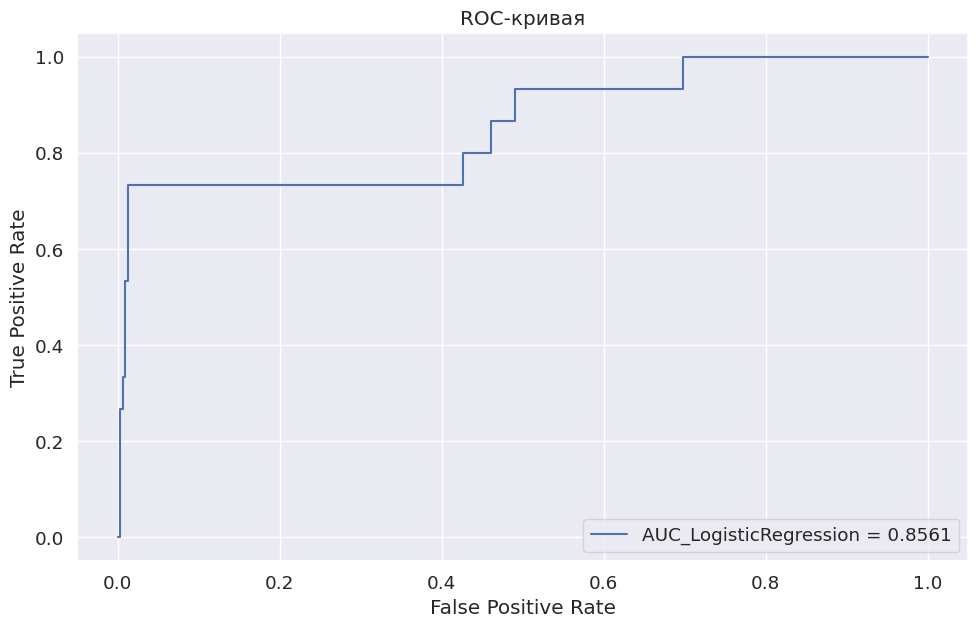

In [ ]:
# Построим график ROC-кривой
plt.figure(figsize=(11.5, 7), dpi=100)
plt.plot(fpr, tpr, label=f'AUC_LogisticRegression = {round(roc_auc,4)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('ROC-кривая');
plt.show()

### Проверим значимость параметров модели

In [ ]:
def wald_test(x, y, beta_hat, model):
    # Получаем матрицу ковариаций
    cov_matrix = np.linalg.inv(np.dot(x.T, x))
    # Получаем стандартные ошибки коэффициентов
    std_err = np.sqrt(np.diagonal(cov_matrix))
    # Получаем t-статистики
    t_stat = beta_hat / std_err
    # Получаем p-value
    p_value = sts.t.sf(np.abs(t_stat), df=len(y) - 1 - 1) * 2
    return p_value

In [ ]:
# Оцениваем значимость параметров
p_values = []
for i in range(model_dict['2020'][4].shape[1]):
    beta_hat = model.coef_[0, i]
    p_value = wald_test(model_dict['2020'][4], model_dict['2020'][1], beta_hat, model_dict['2020'][0])
    p_values.append(p_value)

## 2 модель: за все года вместе взятые 2017|2018|2019|2020 год(а)

### Проверим значимость модели с помощью ROC-кривой:

In [ ]:
# model_dict[year[1:-4]] = [model, y_train_list[max_choise], y_pred_list[max_choise], y_test_list[max_choise], X_train_list[max_choise]]

In [ ]:
# Данные для ROC-AUC кривой
fpr, tpr, treshold = roc_curve(model_dict['2017|2018|2019|2020'][3], model_dict['2017|2018|2019|2020'][2])
roc_auc = auc(fpr, tpr)
roc_auc_model = roc_auc_score(model_dict['2017|2018|2019|2020'][3], model_dict['2017|2018|2019|2020'][2])

# Оценка качества простой базовой модели
y_base = [model_dict['2017|2018|2019|2020'][1].value_counts().idxmax()] * len(model_dict['2017|2018|2019|2020'][3])
roc_auc_base = roc_auc_score(model_dict['2017|2018|2019|2020'][3], y_base)

# Сравнение качества моделей
if roc_auc > roc_auc_base:
    print(f'roc_auc ({np.round(roc_auc,3)}) > roc_auc_base({round(roc_auc_base, 3)}) => Модель значима')
else:
    print(f'roc_auc ({np.round(roc_auc,3)}) < roc_auc_base({round(roc_auc_base, 3)}) => Модель не значима')

roc_auc (0.772) > roc_auc_base(0.5) => Модель значима


## Вывод: метрика ROC AUC модели выше, чем у простой базовой модели, то можно считать, **что модель значима**

### Построим график ROC-кривой

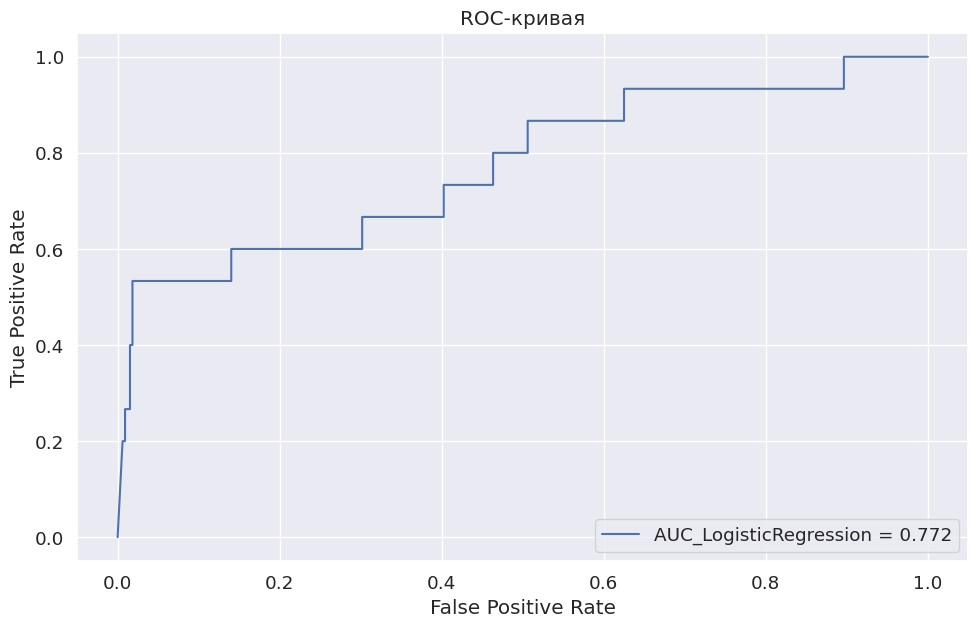

In [ ]:
# Построим график ROC-кривой
plt.figure(figsize=(11.5, 7), dpi=100)
plt.plot(fpr, tpr, label=f'AUC_LogisticRegression = {round(roc_auc,4)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('ROC-кривая');
plt.show()

# Итоговый вывод: В результате работы, было проанализированно 7 различных моделей (и построенно в общей слоности 70 моделей) логистической регрессии для классификации банкротсва компаний в Приволжский ФО с рассмотреним 3-х различных смежных отраслей: Смешанное сельское хозяйство, Выращивание зерновых культур, Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур. 
# Наиболее удачными оказались модели за 2020 год и за вместе взятые 2017+2018+2019+2020 года. Обе модели оказались значимы. Причём за 2020 год модель оказалась всё-таки лучше со следующими показателями:

* **Среднее значение вероятности, с которой правильно происходит предсказание  (mean_accuracy_score) = 0.980 (говорит об отличном качестве модели)**	
* **F1_score = 0.833 (говорит об среднем-допустимом качестве модели)**
* **Коэффициент псевдо-R^2 МакФаддена = 0.787 (говорит об отличном качестве модели)**



In [ ]:
df_differences

,Тип модели классификации,Best_accuracy_score,Mean_accuracy_score,Precision_score,Recall_score,F1_score,Коэффициент псевдо-R^2 МакФаддена
0,2017 год(а),0.954,0.954,0.500,0.182,0.267,0.561
1,2018 год(а),0.954,0.949,0.500,0.364,0.421,0.683
2,2019 год(а),0.971,0.967,0.833,0.455,0.588,0.721
3,2020 год(а),0.983,0.980,0.769,0.909,0.833,0.787
4,2017|2018 год(а),0.971,0.963,0.700,0.636,0.667,0.691
5,2017|2018|2019 год(а),0.979,0.971,0.750,0.818,0.783,0.744
6,2017|2018|2019|2020 год(а),0.983,0.971,0.769,0.909,0.833,0.859
